In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

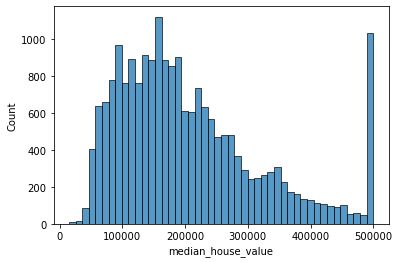

In [5]:
sns.histplot(df['median_house_value'])

In [6]:
df = df[['latitude','longitude','housing_median_age','total_rooms',
         'total_bedrooms','population','households','median_income','median_house_value']]

### Question 1

In [7]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

In [8]:
df.population.median()

1166.0

In [10]:
n= df.shape[0]
np.random.seed(42)

idx= np.arange(n)
np.random.shuffle(idx)

In [11]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [13]:
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n-n_test-n_val

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [20]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


### Linear Regression

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [52]:
df_zero = df_train
df_mean = df_train

df_zero['total_bedrooms'] = df_zero['total_bedrooms'].fillna(0)
X_zero = df_zero.values

df_mean['total_bedrooms'] = df_mean['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
X_mean = df_mean.values


In [53]:
#zero fillna
w_0_zero, w_zero = train_linear_regression(X_zero, y_train)
y_pred_zero = w_0_zero + X_zero.dot(w_zero)

In [54]:
#mean fillna
w_0_mean, w_mean = train_linear_regression(X_mean, y_train)
y_pred_mean = w_0_mean + X_mean.dot(w_mean)

In [55]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [56]:
df_zero_val = df_val
df_mean_val = df_val

df_zero_val['total_bedrooms'] = df_zero_val['total_bedrooms'].fillna(0)
X_zero_val = df_zero_val.values

df_mean_val['total_bedrooms'] = df_mean_val['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
X_mean_val = df_mean_val.values

In [57]:
y_pred_zero_val = w_0 + X_zero_val.dot(w)
y_pred_mean_val = w_0 + X_mean_val.dot(w)

In [58]:
print(round(rmse(y_val, y_pred_zero_val),2))
print(round(rmse(y_val, y_pred_mean_val),2))

0.33
0.33


### Regularization

In [45]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
df_zero = df_train

df_zero['total_bedrooms'] = df_zero['total_bedrooms'].fillna(0)
X_zero = df_zero.values

In [66]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_val = df_val.values
for r in r_list:
    w_0, w = train_linear_regression_reg(X_zero, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),9))

     0 0.328641636
 1e-06 0.328641637
0.0001 0.328641728
 0.001 0.328642597
  0.01 0.328655499
   0.1 0.329074706
     1 0.334712801
     5 0.339793628
    10 0.340861587


### Question 6

In [67]:
n= df.shape[0]
np.random.seed(9)

idx= np.arange(n)
np.random.shuffle(idx)

In [68]:
n_test = int(0.2*n)
n_train = n-n_test

In [69]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [70]:
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [71]:
del df_train['median_house_value']
del df_test['median_house_value']

In [73]:
df_zero = df_train

df_zero['total_bedrooms'] = df_zero['total_bedrooms'].fillna(0)
X_zero = df_zero.values
X_test = df_test.values

In [81]:
w_0, w = train_linear_regression_reg(X_zero, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
print('%6s' %r, rmse(y_test, y_pred))

    10 nan


In [80]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [82]:
error = y_pred - y_test

In [84]:
mse = (error ** 2).mean()

In [86]:
mse

nan